In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
Tess = "D:\\coding\\voiceemotion\\dataset\\tess2"

In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    # Construct the full path to the directory
    dir_path = os.path.join(Tess, dir)
    directories = os.listdir(dir_path)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(dir_path, file))
        
# DataFrame for the emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# DataFrame for the path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
data_path = pd.concat([emotion_df, path_df], axis=1)
data_path.head()

,Emotions,Path
0,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
1,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
2,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
3,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
4,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...


In [5]:
data_path.to_csv("Tess_df.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
1,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
2,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
3,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...
4,angry,D:\coding\voiceemotion\dataset\tess2\anger\OAF...


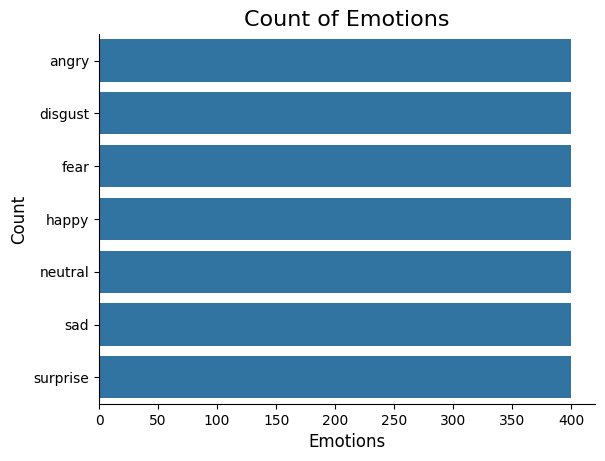

In [6]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [7]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)  # Use waveshow instead of waveplot
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

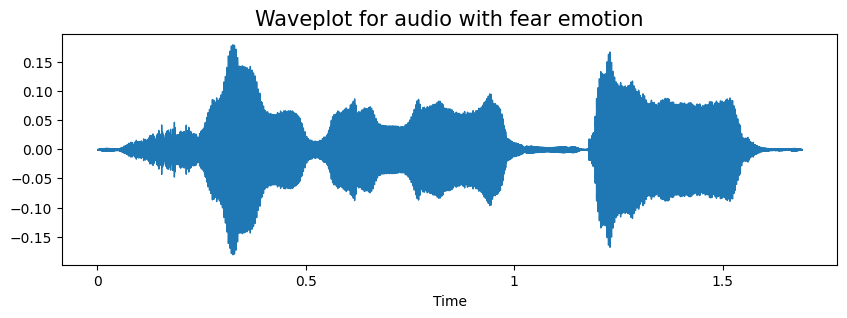

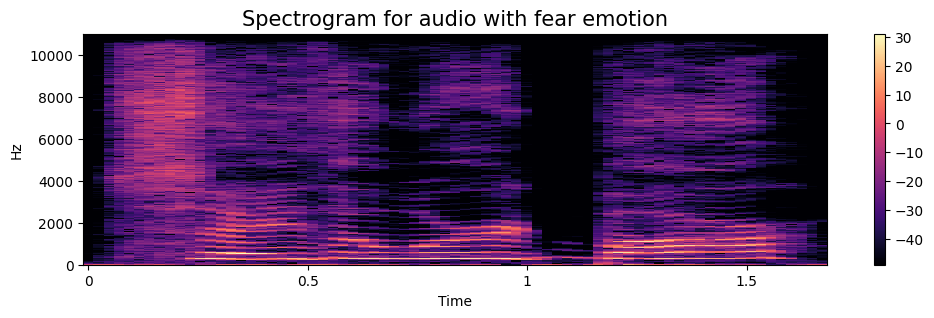

In [8]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

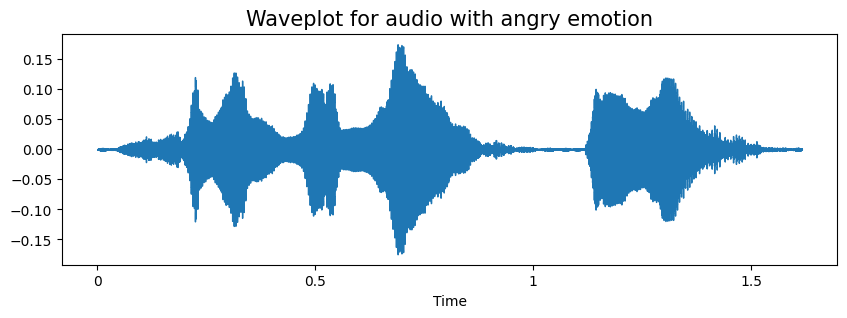

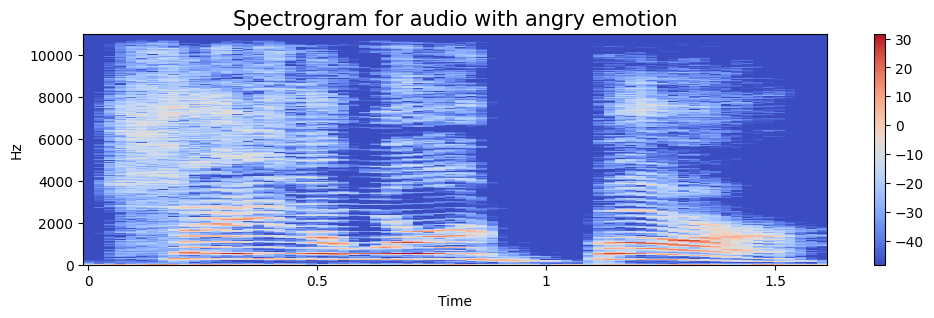

In [9]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

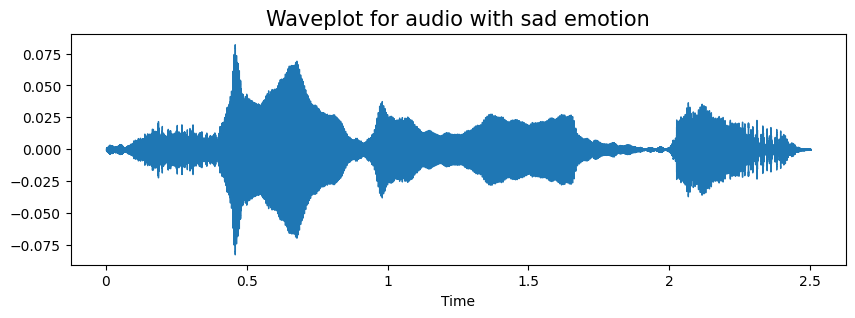

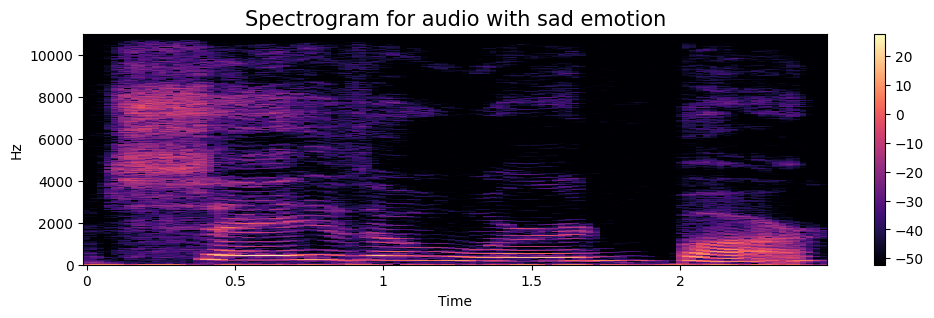

In [10]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

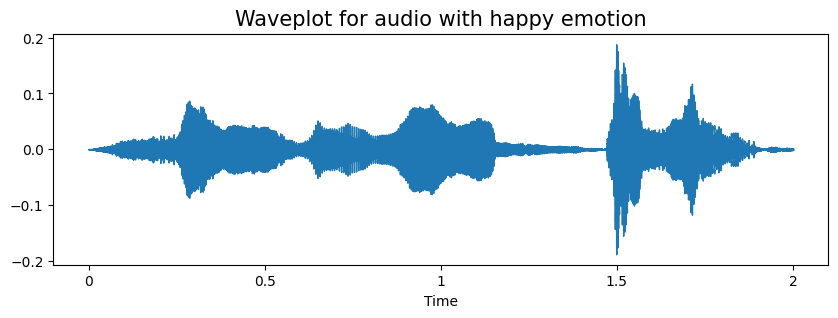

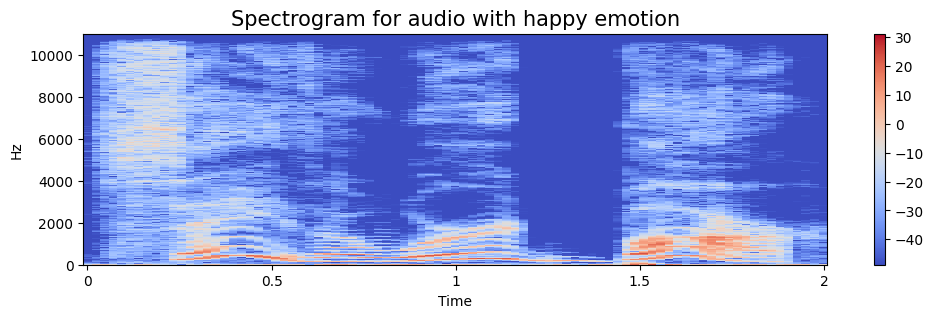

In [11]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [12]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)  # Use rate as a keyword argument


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, n_steps=pitch_factor, sr=sampling_rate)  # Use 'sr' as a keyword argument

# Taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

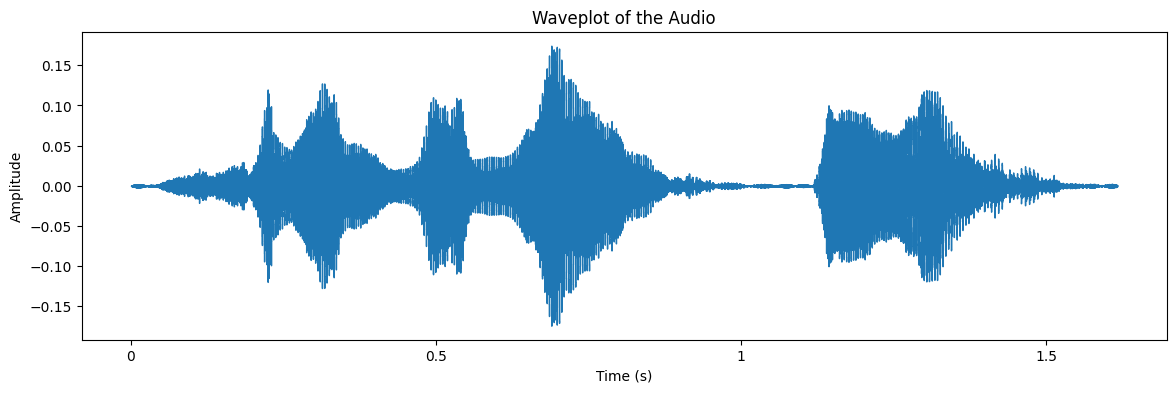

In [13]:
# Use waveshow instead of waveplot
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)  # Corrected line
plt.title('Waveplot of the Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(path)  # This will create an audio player

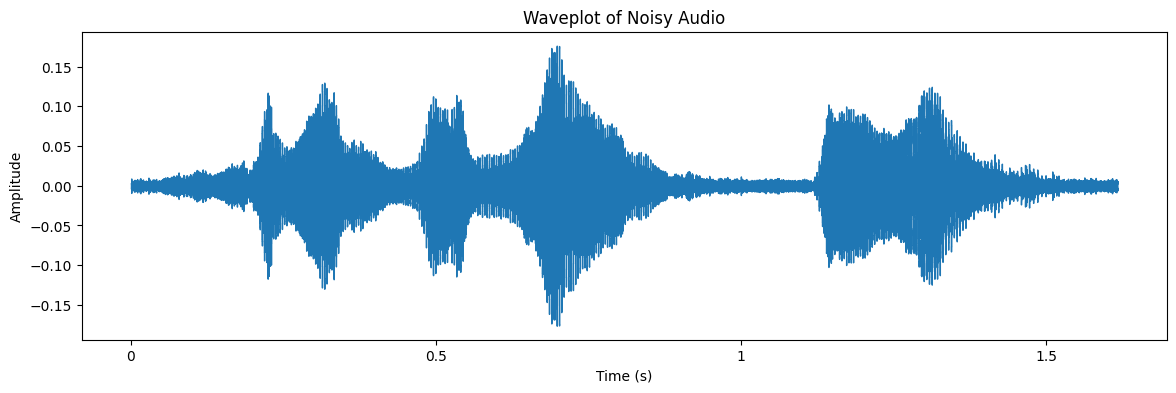

In [14]:
x = noise(data)

# Plot the waveplot using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Use waveshow instead of waveplot
plt.title('Waveplot of Noisy Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the noisy audio
Audio(x, rate=sample_rate)  # This will create an audio player

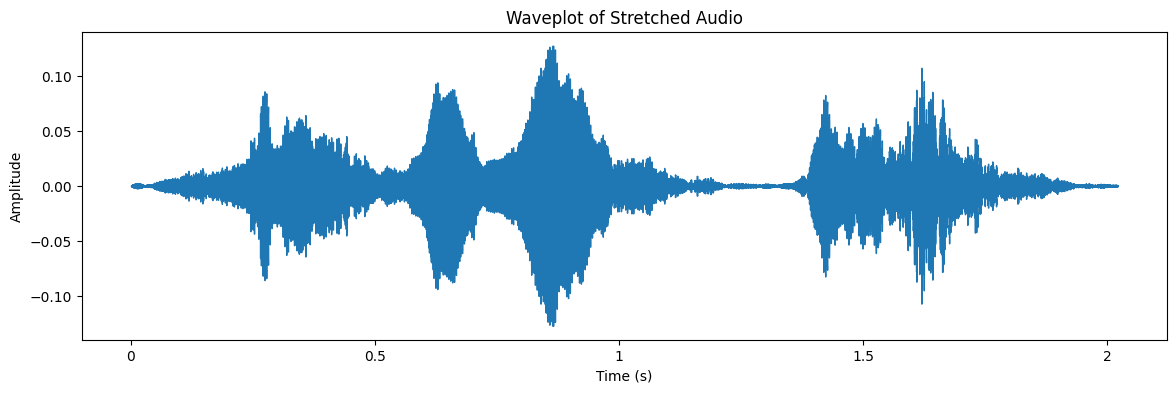

In [15]:
x = stretch(data)

# Plot the waveplot using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Use waveshow instead of waveplot
plt.title('Waveplot of Stretched Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the stretched audio
Audio(x, rate=sample_rate)  # This will create an audio player

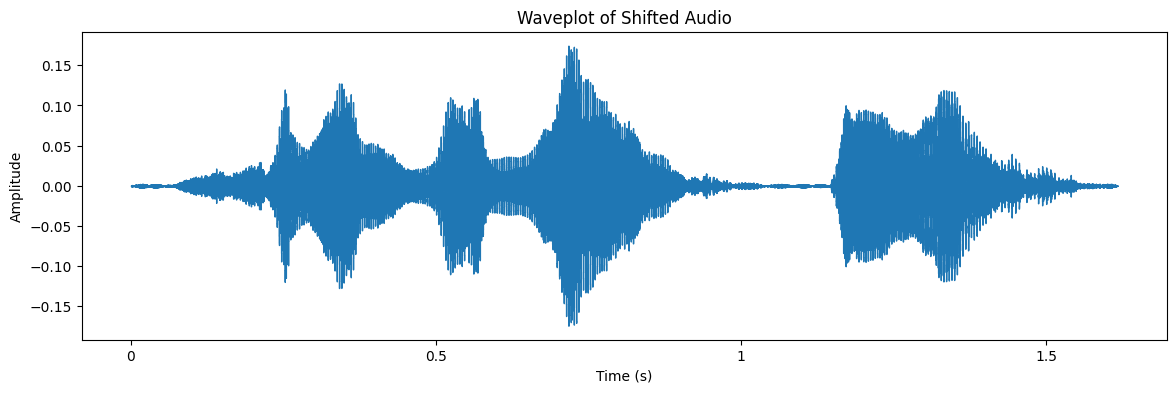

In [16]:
x = shift(data)

# Plot the waveplot using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Use waveshow instead of waveplot
plt.title('Waveplot of Shifted Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the shifted audio
Audio(x, rate=sample_rate)

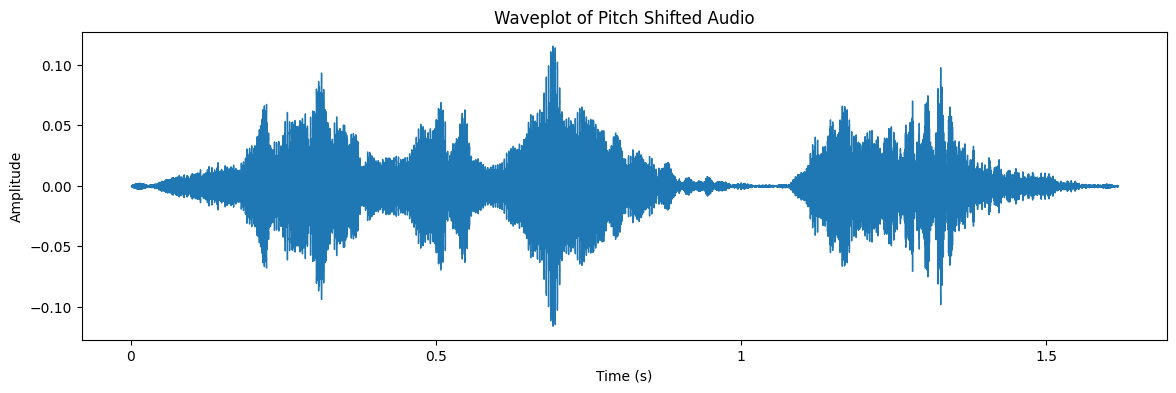

In [17]:
x = pitch(data, sample_rate)

# Plot the waveplot using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # Use waveshow instead of waveplot
plt.title('Waveplot of Pitch Shifted Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the pitch-shifted audio
Audio(x, rate=sample_rate) 

In [18]:
rms =librosa.feature.rms(y=data).T
rms.shape


(70, 1)

In [19]:
def rmse(data):
    hop_length = 512
    frame_length = 1024
    n_fft = 1

    rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)

    rmse = rmse[0]

    energy = np.array([ sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)])
   

In [20]:
def mler(rms):
    lef=0
    delta=0.06
    lowthresh=rms.mean()*delta
    for val in rms:
        lef+=np.sign(lowthresh-val)+1
    mler=lef/len(rms)
    return mler

def extract_features(data):
    result = np.array([])

    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    # Spectral Centroid
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, spec_cent))  # stacking horizontally

    # Spectral Flux
    onset_env = np.mean(librosa.onset.onset_strength(sr=sample_rate, S=librosa.amplitude_to_db(data, ref=np.max)))
    result = np.hstack((result, onset_env))

    # mler
    Mler = mler(rms)
    result = np.hstack((result, Mler))

    # Chroma CENS
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=data, sr=sample_rate))
    result = np.hstack((result, chroma_cens))

    # Spectral Roll-off
    spec_rolloff = np.mean(librosa.feature.spectral_rolloff(y=data, sr=sample_rate))  # Corrected to use 'y' and 'sr' as keyword args
    result = np.hstack((result, spec_rolloff))

    return result


def get_features(path):
    # Print the file path to debug
    print(f"Loading file: {path}")

    # duration and offset are used to take care of the no audio in start and the ending of each audio file
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [21]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
        

Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_back_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_bar_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_base_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_bath_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_bean_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_beg_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_bite_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_boat_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_bone_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_book_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_bought_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_burn_angry.wav
Loading file: D:\coding\voiceemotion\dataset\tess2\anger\OAF_cab_angry.wav
Loading file:

In [22]:
len(X), len(Y), data_path.Path.shape


(8400, 8400, (2800,))

In [23]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,labels
0,0.054342,0.538993,0.596808,0.396304,0.364695,0.441099,0.413557,0.373404,0.568096,0.573010,...,0.000070,0.000038,0.000034,6.250596e-06,1523.727747,1.563507,0.0,0.270268,2496.538562,angry
1,0.185916,0.659783,0.735744,0.543932,0.499956,0.573871,0.571498,0.449931,0.608575,0.684940,...,0.000814,0.000750,0.000765,7.902946e-04,3366.184882,3.317456,0.0,0.269007,6469.677139,angry
2,0.073797,0.544288,0.592730,0.374030,0.335800,0.388966,0.397715,0.296939,0.535087,0.623333,...,0.000037,0.000024,0.000007,3.829296e-07,1671.735650,1.931125,0.0,0.260960,2694.605928,angry
3,0.058006,0.635519,0.406851,0.370775,0.404711,0.507197,0.455434,0.395454,0.421722,0.353537,...,0.000021,0.000019,0.000015,9.260864e-07,1323.141041,1.649317,0.0,0.255599,1989.129639,angry
4,0.209584,0.803199,0.626528,0.545420,0.534776,0.580565,0.513240,0.459229,0.512015,0.504769,...,0.000887,0.000918,0.000873,8.113287e-04,3673.146133,3.402007,0.0,0.260778,7758.315208,angry


In [24]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [25]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 167), (6300, 7), (2100, 167), (2100, 7))

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 167), (6300, 7), (2100, 167), (2100, 7))

In [28]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 167, 1), (6300, 7), (2100, 167, 1), (2100, 7))

In [29]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=28, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 167, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 84, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 84, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 42, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 42, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28)                  │          19,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 554,407 (2.11 MB)

 Trainable params: 554,407 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2829 - loss: 1.7672 - val_accuracy: 0.7500 - val_loss: 0.8178 - learning_rate: 0.0010
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6716 - loss: 0.9178 - val_accuracy: 0.8771 - val_loss: 0.3524 - learning_rate: 0.0010
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8188 - loss: 0.5099 - val_accuracy: 0.9110 - val_loss: 0.2576 - learning_rate: 0.0010
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8752 - loss: 0.3541 - val_accuracy: 0.9386 - val_loss: 0.1996 - learning_rate: 0.0010
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8905 - loss: 0.3055 - val_accuracy: 0.9410 - val_loss: 0.1704 - learning_rate: 0.0010
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9168 - loss: 0.2458 - val_accuracy: 0.9529 - val_loss: 0.1477 - learning_rate: 0.0010
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9252 - loss: 0.2107 - val_acc

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9909 - loss: 0.0488
Accuracy of our model on test data :  98.95238280296326 %


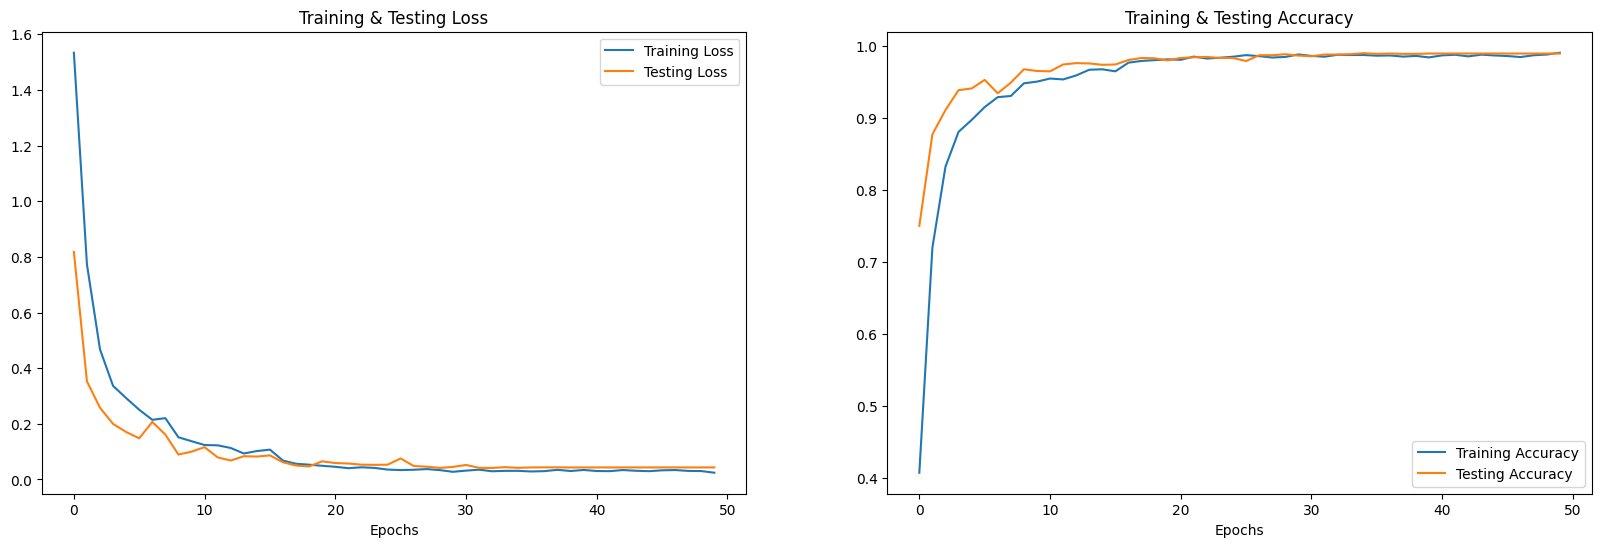

In [31]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [32]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [33]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,fear,fear
2,fear,fear
3,disgust,disgust
4,fear,fear
5,neutral,neutral
6,neutral,neutral
7,happy,happy
8,neutral,neutral
9,neutral,neutral


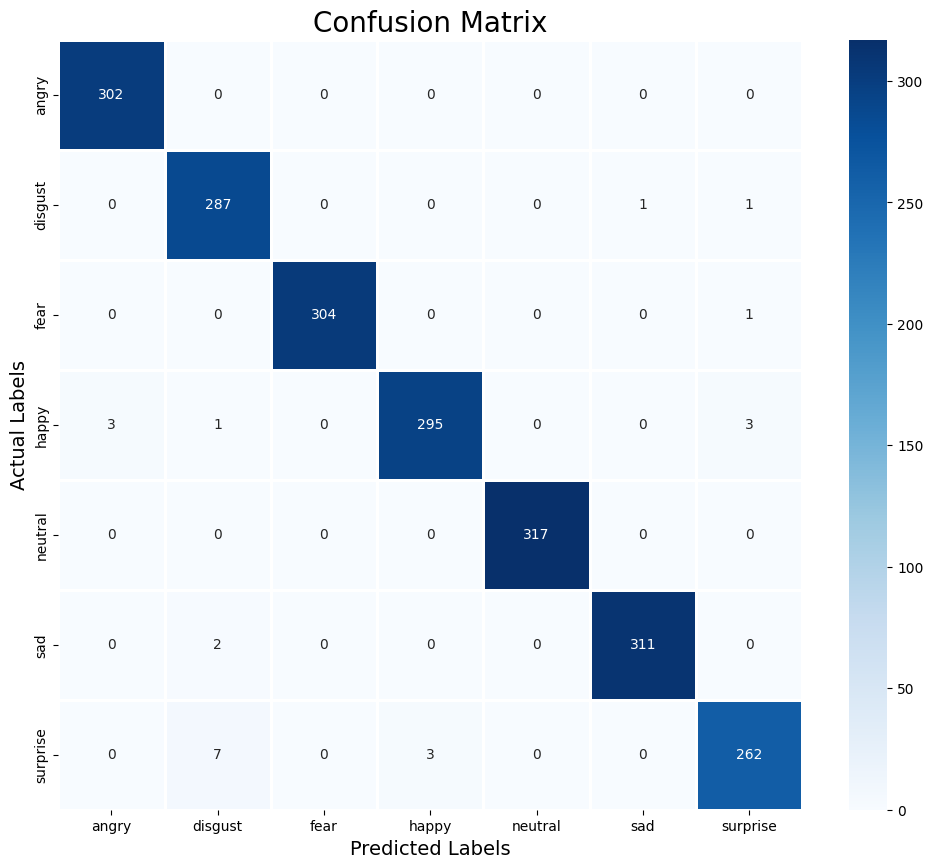

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.99      1.00      1.00       302
     disgust       0.97      0.99      0.98       289
        fear       1.00      1.00      1.00       305
       happy       0.99      0.98      0.98       302
     neutral       1.00      1.00      1.00       317
         sad       1.00      0.99      1.00       313
    surprise       0.98      0.96      0.97       272

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [38]:
model.save('Voice_Emotion_Engine.keras')

In [39]:
model.save('Voice_Emotion_Engine.h5')